# POSTTEST 8 DEEP LEARNING

Nama : Herni Suhartati <br>
NIM : 2109106001 <br>
Kelas : A1 Informatika 2021 <br>

### Beans Dataset Tensorflow

#### Import Library

In [50]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential, layers

### Klasifikasi dataset

Membagi dataset menjadi 60% untuk data training dan 40% untuk data testing

In [51]:
(x_train_beans, y_train_beans), (x_test_beans, y_test_beans) = tfds.load(
    "beans",
    split=["train[:60%]", "train[:40%]"],
    batch_size=-1,
    as_supervised=True,
)

### Dimensi 

In [52]:
print("Dimensi x_train: ",x_train_beans.shape)
print("Dimensi x_test: ",x_test_beans.shape)

Dimensi x_train:  (620, 500, 500, 3)
Dimensi x_test:  (414, 500, 500, 3)


### Encoding Label pada Gambar
Jumlah class dalam dataset beans tensorflow ada 3 yaitu 2 kelas penyakit dan kelas sehat.

In [53]:
num_class=3
x_train = tf.image.resize(x_train_beans, (28, 28)) # Mengubah ukuran gambar dataset menjadi 28x28
x_test = tf.image.resize(x_test_beans, (28, 28))
x_train = np.reshape(x_train.numpy(), (620, 2352))
x_test = np.reshape(x_test.numpy(), (414, 2352))
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=keras.utils.to_categorical(y_train_beans,num_class)
y_test=keras.utils.to_categorical(y_test_beans,num_class)

### Tampilan dataset

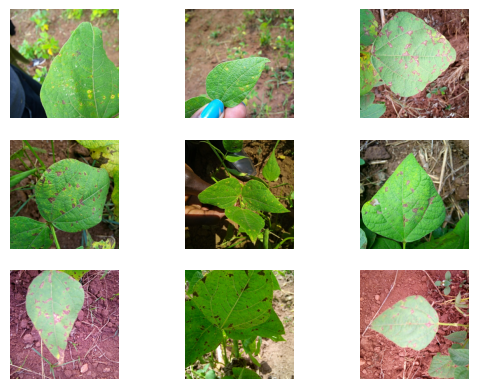

In [54]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_train_beans[i])
  plt.axis('off')
  
plt.show()

### Pembuatan model dengan DNN (Deep Neural Network)

In [66]:
model = Sequential(
  [
    layers.Dense(128, activation='relu', input_dim=2352),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
  ]
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               301184    
                                                                 
 dense_25 (Dense)            (None, 32)                4128      
                                                                 
 dense_26 (Dense)            (None, 3)                 99        
                                                                 
Total params: 305,411
Trainable params: 305,411
Non-trainable params: 0
_________________________________________________________________


### Compile Model

Karena menggunakan dataset yang memiliki 3 kelas sehingga menggunakan  `loss 'categorical_crossentropy'`

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training Model

In [68]:
model.fit(x_train, y_train, batch_size=5, epochs=50)

Epoch 1/50
124/124 [==============================] - 1s 3ms/step - loss: 1.1743 - accuracy: 0.3661
Epoch 2/50
124/124 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.4774
Epoch 3/50
124/124 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.5661
Epoch 4/50
124/124 [==============================] - 0s 2ms/step - loss: 0.7883 - accuracy: 0.6355
Epoch 5/50
124/124 [==============================] - 0s 2ms/step - loss: 0.7857 - accuracy: 0.6452
Epoch 6/50
124/124 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.6548
Epoch 7/50
124/124 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7016
Epoch 8/50
124/124 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.6887
Epoch 9/50
124/124 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.6726
Epoch 10/50
124/124 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.6855

### Evaluasi model yang telah di train

In [69]:

score = model.evaluate(x_test, y_test)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

13/13 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9976
Test Loss:  0.03377176821231842
Test Accuracy:  0.9975845217704773


### Simpan model

In [63]:
model.save('modelBeans.h5')